In [32]:
!pip install --upgrade python

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [48]:
print (dir(tf.keras.callbacks))

['BaseLogger', 'CSVLogger', 'Callback', 'CallbackList', 'EarlyStopping', 'History', 'LambdaCallback', 'LearningRateScheduler', 'ModelCheckpoint', 'ProgbarLogger', 'ReduceLROnPlateau', 'RemoteMonitor', 'TensorBoard', 'TerminateOnNaN', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'experimental']


In [1]:
!pip install pandas==2.0.3 numpy==1.24.3 scikit-learn matplotlib 

     |████████████████████████████████| 12.4 MB 10.5 MB/s            
     |████████████████████████████████| 17.3 MB 65.8 MB/s            
     |████████████████████████████████| 11.1 MB 100.8 MB/s            
     |████████████████████████████████| 9.2 MB 127.8 MB/s            
     |████████████████████████████████| 346 kB 73.3 MB/s            
     |████████████████████████████████| 302 kB 112.6 MB/s            
     |████████████████████████████████| 34.5 MB 65.2 MB/s            
     |████████████████████████████████| 103 kB 64.6 MB/s            
     |████████████████████████████████| 301 kB 80.4 MB/s            
     |████████████████████████████████| 4.5 MB 75.9 MB/s            
     |████████████████████████████████| 4.7 MB 97.3 MB/s            
     |████████████████████████████████| 1.2 MB 60.4 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's d

In [3]:
!unzip npy.zip

Archive:  npy.zip
  inflating: npy/256_192_test.npy    
  inflating: npy/256_192_train.npy   
  inflating: npy/256_192_val.npy     
  inflating: npy/test_labels.npy     
  inflating: npy/train_labels.npy    
  inflating: npy/val_labels.npy      


In [3]:
import os
from glob import glob
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import Model
from keras.applications.densenet import DenseNet201
from tensorflow.keras.callbacks import ReduceLROnPlateau

%matplotlib inline
import matplotlib.pyplot as plt

## Load In the Dataset

In [22]:
X_train = np.load("/notebooks/npy/256_192_train.npy")

In [23]:
y_train = np.load("/notebooks/npy/train_labels.npy")

In [24]:
X_val = np.load("/notebooks/npy/256_192_val.npy")

In [25]:
y_val = np.load("/notebooks/npy/val_labels.npy")

In [26]:
X_train.shape, X_val.shape

((8111, 192, 256, 3), (902, 192, 256, 3))

In [27]:
y_train.shape, y_val.shape

((8111,), (902,))

In [28]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [29]:
y_train.shape, y_val.shape

((8111, 7), (902, 7))

## Load In the Model

In [30]:
pre_trained_model = DenseNet201(input_shape=(192, 256, 3), include_top=False, weights="imagenet")

In [31]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(pre_trained_model.layers))

input_2
zero_padding2d_2
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_3
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3

In [32]:
last_layer = pre_trained_model.get_layer('relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 6, 8, 1920)


## Define the Model

In [33]:
# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.7
x = layers.Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model

model = Model(pre_trained_model.input, x)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 192, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 198, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 96, 128, 64)  9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 96, 128, 64)  256         conv1/conv[0][0]                 
____________________________________________________________________________________________

## Training

### Feature Extraction

In [35]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [36]:
batch_size = 32
epochs = 3
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size), 
                              validation_steps=(X_val.shape[0] // batch_size))

Epoch 1/3
253/253 [==============================] - 265s 1s/step - loss: 1.4071 - accuracy: 0.6299 - val_loss: 0.9360 - val_accuracy: 0.6775
Epoch 2/3
253/253 [==============================] - 261s 1s/step - loss: 0.9345 - accuracy: 0.6865 - val_loss: 0.8457 - val_accuracy: 0.6998
Epoch 3/3
253/253 [==============================] - 259s 1s/step - loss: 0.8528 - accuracy: 0.7034 - val_loss: 0.8503 - val_accuracy: 0.6987


### Retraining

In [37]:
for layer in pre_trained_model.layers:
    layer.trainable = True

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [39]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_learning_rate=0.000001, cooldown=2)

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 192, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 198, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 96, 128, 64)  9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 96, 128, 64)  256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True,)
save = tf.keras.callbacks.experimental.BackupAndRestore(
    backup_dir='/notebooks')

In [42]:
batch_size = 32
epochs = 20
history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              validation_steps=(X_val.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction, save, early_stopping ])

/opt/tensorflow_2/lib/python3.8/site-packages/keras/engine/training.py:1977: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
253/253 [==============================] - 1368s 5s/step - loss: 0.8033 - acc: 0.7153 - val_loss: 1.0252 - val_acc: 0.7154
Epoch 2/20
253/253 [==============================] - 1284s 5s/step - loss: 0.5743 - acc: 0.7922 - val_loss: 0.6147 - val_acc: 0.7734
Epoch 3/20
253/253 [==============================] - 1275s 5s/step - loss: 0.4960 - acc: 0.8195 - val_loss: 0.5864 - val_acc: 0.7913
Epoch 4/20
253/253 [==============================] - 1269s 5s/step - loss: 0.4251 - acc: 0.8463 - val_loss: 0.5642 - val_acc: 0.8181
Epoch 5/20
253/253 [==============================] - 1264s 5s/step - loss: 0.3813 - acc: 0.8586 - val_loss: 0.8024 - val_acc: 0.8080
Epoch 6/20
253/253 [==============================] - 1206s 5s/step - loss: 0.3528 - acc: 0.8723 - val_loss: 0.5495 - val_acc: 0.8158
Epoch 7/20
253/253 [==============================] - 1196s 5s/step - loss: 0.3082 - acc: 0.8897 - val_loss: 0.6002 - val_acc: 0.8170

Epoch 00007: ReduceLROnPlateau reducing learning rate to 4.99

In [43]:
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

29/29 [==============================] - 24s 772ms/step - loss: 0.4726 - acc: 0.8537
Validation: accuracy = 0.853659  ;  loss_v = 0.472622


## Testing

In [44]:
X_test = np.load("/notebooks/npy/256_192_test.npy")

In [45]:
y_test = np.load("/notebooks/npy/test_labels.npy")
y_test = to_categorical(y_test)

In [46]:
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

32/32 [==============================] - 25s 789ms/step - loss: 0.4548 - acc: 0.8752
Test: accuracy = 0.875250  ;  loss = 0.454847


In [47]:
model.save("DenseNetFull.h5")

Text(0.5, 1.0, 'Training and validation loss')

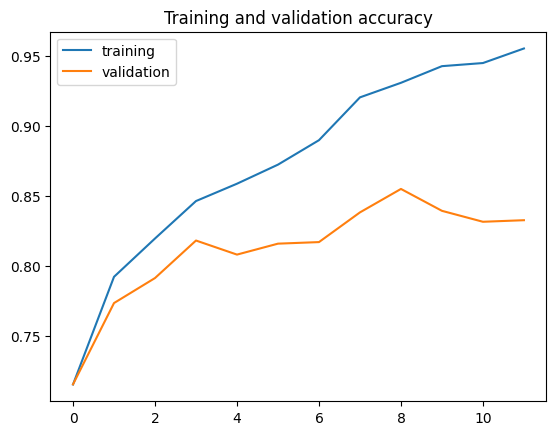

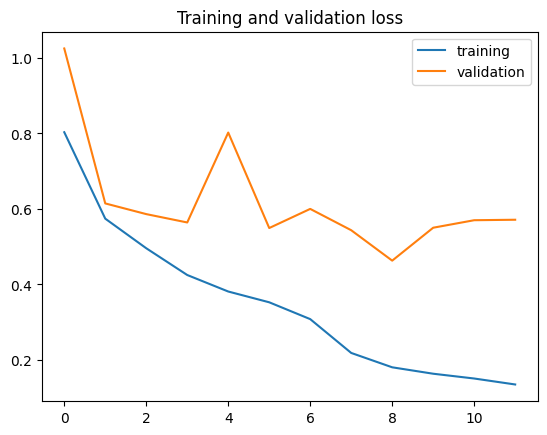

In [48]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')